In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import neattext.functions as nfx

In [4]:
csv_path = "S:\\ML-Project\\Emotion-Detection\\Emotion-Detection-ML\\data\\emotion_detection.csv"
csv_path2="S:\\ML-Project\\Emotion-Detection\\Emotion-Detection-ML\\data\\emotion_dataset.csv"


df = pd.read_csv(csv_path2)

In [5]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [6]:
df.shape

(34792, 4)

In [7]:
df.dtypes


Unnamed: 0     int64
Emotion       object
Text          object
Clean_Text    object
dtype: object

In [8]:
df.isnull().sum()

Unnamed: 0      0
Emotion         0
Text            0
Clean_Text    466
dtype: int64

In [9]:
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion'>

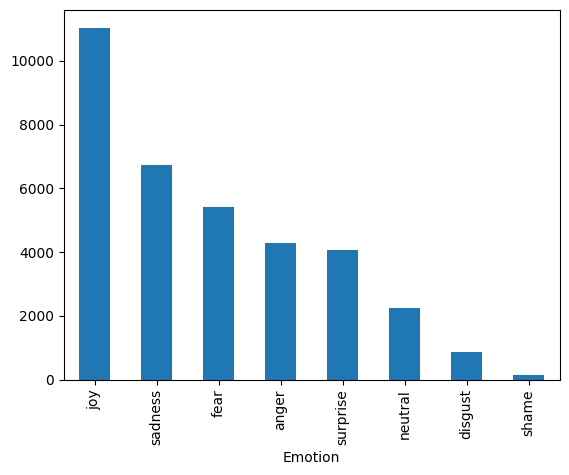

In [10]:
df['Emotion'].value_counts().plot(kind='bar')

<Axes: xlabel='count', ylabel='Emotion'>

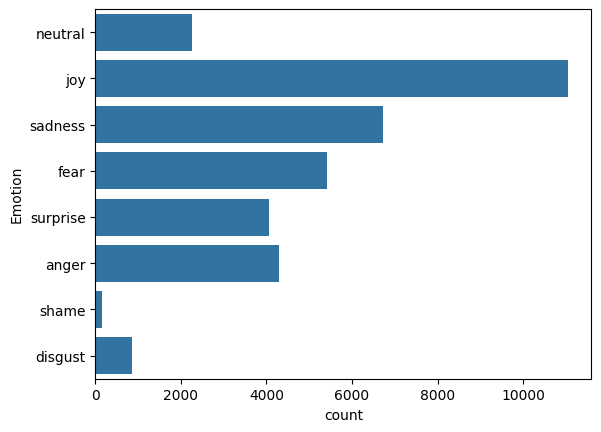

In [11]:
sns.countplot(df['Emotion'])

### Exploration
+ Sentiment Analysis
+ Keyword Extraction
    -Keywords for each emotion
    -Worldcloud

In [12]:
from textblob import TextBlob

In [13]:
def get_sentiment(text):
    blob= TextBlob(text)
    sentiment =blob.sentiment.polarity
    if sentiment>0:
        result="Positive"
    elif sentiment<0:
        result="Negative"
    else:
        result="Neutral"
    return result
    

In [14]:
get_sentiment("I love coding")

'Positive'

In [15]:
df["Sentiment"]=df["Text"].apply(get_sentiment)

In [16]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text,Sentiment
0,0,neutral,Why ?,NaN,Neutral
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow,Neutral
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...,Negative
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...,Positive
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...,Neutral


In [17]:
df.groupby(["Emotion","Sentiment"]).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      325
          Neutral       249
          Positive      282
fear      Negative     1535
          Neutral      1843
          Positive     2032
joy       Negative     1682
          Neutral      3648
          Positive     5715
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1546
          Positive     1893
dtype: int64

<Axes: xlabel='Emotion,Sentiment'>

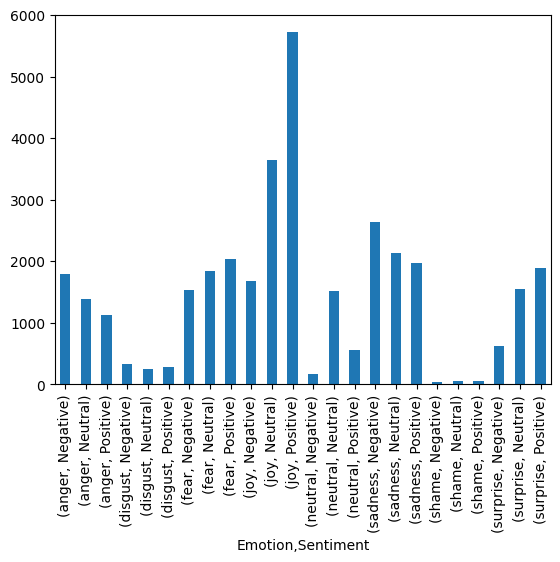

In [18]:
df.groupby(["Emotion","Sentiment"]).size().plot(kind="bar")

In [19]:

sns.catplot

<function seaborn.categorical.catplot(data=None, *, x=None, y=None, hue=None, row=None, col=None, kind='strip', estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, units=None, weights=None, order=None, hue_order=None, row_order=None, col_order=None, col_wrap=None, height=5, aspect=1, log_scale=None, native_scale=False, formatter=None, orient=None, color=None, palette=None, hue_norm=None, legend='auto', legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, ci=<deprecated>, **kwargs)>

C:\Users\Sk190\AppData\Local\Temp\ipykernel_7460\4186563536.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Emotion", data=df, palette="coolwarm")  # 🔥 Try different palettes


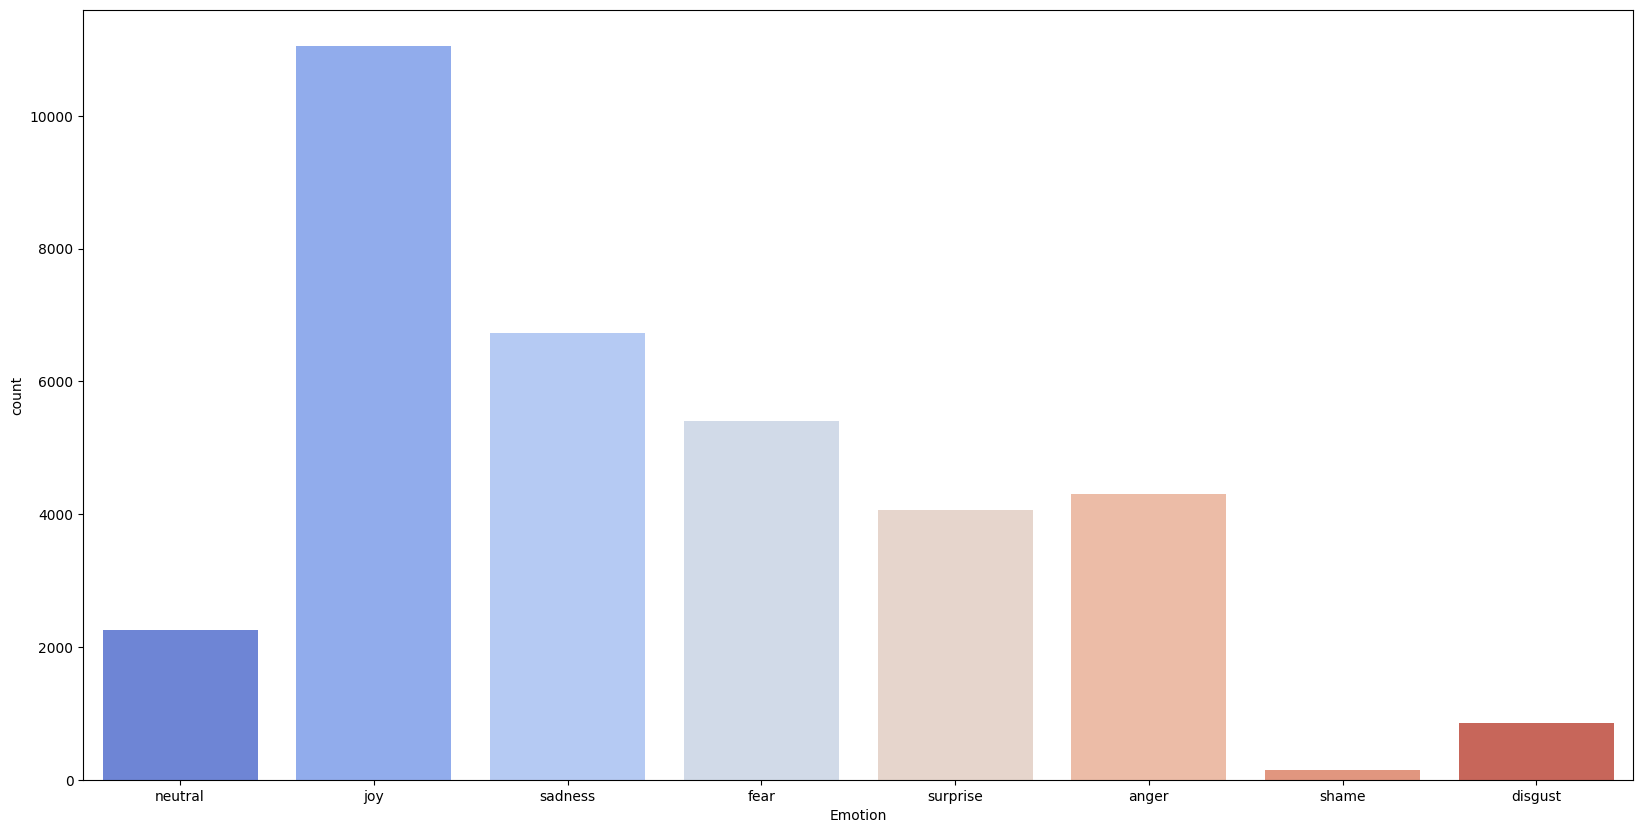

In [20]:
plt.figure(figsize=(20, 10))

# `palette` parameter ka use karke colorful graph
sns.countplot(x="Emotion", data=df, palette="coolwarm")  # 🔥 Try different palettes

plt.show()

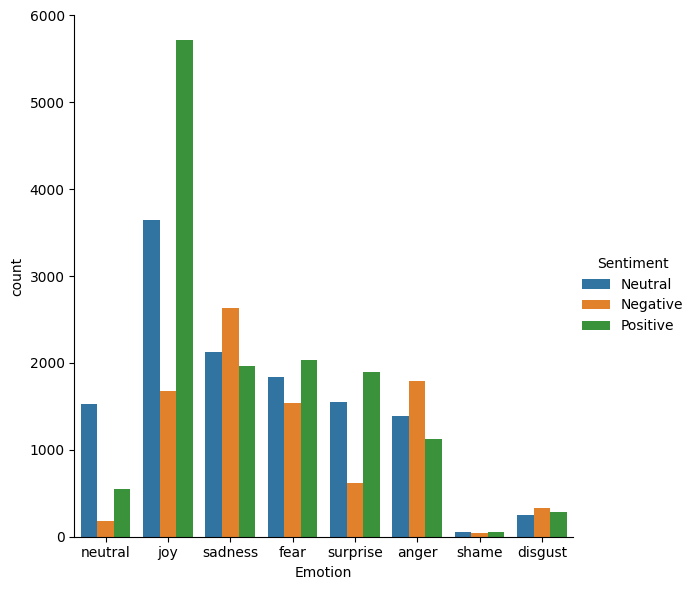

In [21]:
sns.catplot(x="Emotion", hue="Sentiment", data=df, kind="count", height=6, aspect=1)

### text cleaning
+ Remove Noise
    - stopwords
    - special character
    - punctuation
    - emojis

In [22]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [23]:
df['Text']

0                                                   Why ? 
1          Sage Act upgrade on my to do list for tommorow.
2        ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3         Such an eye ! The true hazel eye-and so brill...
4        @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...
                               ...                        
34787    @MichelGW have you gift! Hope you like it! It'...
34788    The world didnt give it to me..so the world MO...
34789                             A man robbed me today . 
34790    Youu call it JEALOUSY, I call it of #Losing YO...
34791    I think about you baby, and I dream about you ...
Name: Text, Length: 34792, dtype: object

In [25]:
df['Clean_Text']=df['Text'].apply(nfx.remove_stopwords)

In [27]:
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_userhandles)

In [26]:
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_punctuations)

In [29]:
df[['Text','Clean_Text']]

,Text,Clean_Text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,A man robbed me today .,man robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU
